This file is to create a picture for sudden and adiabatic switching. Showing density and Sz correlations on the same plot. It plot analytical results vs results from MPS obtained with N=20 for sudden and N=40 for adiabatic

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
%matplotlib inline
import random
import time
from scipy.integrate import quad
import os

In [2]:
#define parameters
N_sudden = 20
N_adiabatic = 40

J = 1
F = 0.5

#define variables for mu
mui = 0
muf = 5
dmu = 0.1


muArray = np.arange(mui,muf+dmu,dmu)

muAnal = np.linspace(0, 5, 400)


In [3]:
# Define the folder path
folder = f"output_sudden_N={N_sudden},F={F}"

# Initialize empty lists to store the data
density_sudden = []
Sz_correlation2_sudden = []
Sx_correlation2 = []
Sy_correlation2 = []
Sz_correlation3 = []

print(f"Reading data from folder: {folder}")

# Start timing
start_time = time.time()

# Loop through the files from 1 to 51 (inclusive)
for i in range(1, 52): # Julia's 1:51 translates to Python's range(1, 52) sudden_output_for_N=20_mu1
    filename = os.path.join(folder, f"sudden_output_for_N={N_sudden}_mu{i}.txt")
    
    try:
        # Read the data from the file. 
        # Assuming each file contains 5 float numbers, one per line or space-separated on a single line.
        # If it's a single line of space-separated numbers, np.loadtxt will handle it.
        # If each number is on a new line, np.loadtxt also handles it by default.
        data = np.loadtxt(filename)
        
        # Check if the data has the expected length (5 elements)
        if len(data) == 5:
            # Append data to the respective lists (Python uses 0-based indexing)
            density_sudden.append(data[0])
            Sz_correlation2_sudden.append(data[1])
            Sx_correlation2.append(data[2])
            Sy_correlation2.append(data[3])
            Sz_correlation3.append(data[4])
        else:
            print(f"Warning: File {filename} does not contain 5 elements. Skipping.")

    except FileNotFoundError:
        print(f"Error: File not found at {filename}. Skipping.")
    except Exception as e:
        print(f"Error reading {filename}: {e}. Skipping.")

# End timing
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Finished reading data in {elapsed_time:.4f} seconds.")

Reading data from folder: output_sudden_N=20,F=0.5
Finished reading data in 0.2396 seconds.


In [4]:
Sx_correlation2_np = np.array(Sx_correlation2)
Sy_correlation2_np = np.array(Sy_correlation2)

SpSm_sudden = 0.25 * (Sx_correlation2_np + Sy_correlation2_np)

In [5]:
# Compute rho_down
rho_down_sudden = 2 * np.piecewise(muAnal, 
                         [np.abs(muAnal) > 2 * np.abs(J), np.abs(muAnal) <= 2 * np.abs(J)],
                         [lambda mu: (F**2 / (2 * (F**2 - J**2))) * (1 - np.abs(mu) / np.sqrt(mu**2 + 4 * (F**2 - J**2))),
                          lambda mu: F / (2 * (F + J))])

# Compute Q1
Q1_sudden = np.piecewise(muAnal, 
                  [np.abs(muAnal) > 2 * np.abs(J), np.abs(muAnal) <= 2 * np.abs(J)],
                  [lambda mu: (2 * F**2 * (mu**2 - 4 * J**2)) / ((mu**2 - 4 * J**2 + 4 * F**2) * (mu**2 - 2 * J**2 + 2 * F**2 + mu * np.sqrt(mu**2 - 4 * (J**2 - F**2)))),
                   lambda mu: 0])

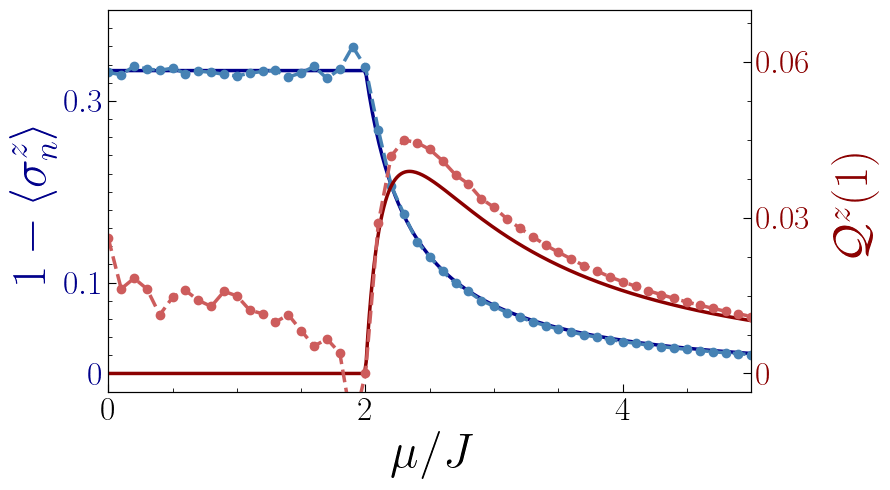

In [9]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

fig, ax1 = plt.subplots(figsize=(9, 5))
ax2 = ax1.twinx()

color1 = '#4682B4'   # SteelBlue - a bit darker for dashed line
dashed_color1 = '#00008B'   # Darker blue for solid line
color2 = '#CD5C5C'   # IndianRed - a bit darker for dashed line
dashed_color2 = '#8B0000'   # Darker red for solid line
color1_axis_label = '#00008B' # Darker blue for axis label and ticks
color2_axis_label = '#8B0000' # Darker red for axis label and ticks


# Plotting lines with updated styles
ax1.plot(muArray, density_sudden, color=color1, linewidth=2.5, linestyle='dashed', marker='o', markersize=6, label=r'$1 - \langle \sigma_n^z \rangle$ (MPS)', zorder=2)
ax1.plot(muAnal, rho_down_sudden, color=dashed_color1, linewidth=2.5, linestyle='solid', label=r'$1 - \langle \sigma_n^z \rangle$ (Theory)', zorder=1)
ax2.plot(muArray, Sz_correlation2_sudden, color=color2, linewidth=2.5, linestyle='dashed', marker='o', markersize=6, label=r'$\mathcal{Q}^{z}(1)$ (MPS)', zorder=2)
ax2.plot(muAnal, Q1_sudden, color=dashed_color2, linewidth=2.5, linestyle='solid', label=r'$\mathcal{Q}^{z}(1)$ (Theory)', zorder=1)

ax1.set_xlabel(r'$\mu/J$', fontsize=35)
ax1.set_ylabel(r'$1 - \langle \sigma_n^z \rangle$', color=color1_axis_label, fontsize=35)
ax2.set_ylabel(r'$\mathcal{Q}^{z}(1)$', color=color2_axis_label, fontsize=35, rotation=90, labelpad=15)

ax1.tick_params(axis='y', labelcolor=color1_axis_label)
ax2.tick_params(axis='y', labelcolor=color2_axis_label)
ax1.tick_params(axis='both', which='major', direction='in', length=6, labelsize=16)
ax1.tick_params(axis='both', which='minor', direction='in', length=3, labelsize=16)
ax2.tick_params(axis='both', which='major', direction='in', length=6, labelsize=16)
ax2.tick_params(axis='both', which='minor', direction='in', length=3, labelsize=16)

ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

ax1.set_ylim([-0.02, 0.4])
ax2.set_ylim([-0.0035, 0.07])
ax1.set_xlim([0, 5])

ax1.set_xticks([0, 2, 4], labels=[r'$0$', r'$2$', r'$4$'], fontsize=24)
ax1.set_yticks([0, 0.1, 0.3], labels=[r'$0$', r'$0.1$', r'$0.3$'], fontsize=24)
ax2.set_yticks([0, 0.03, 0.06], labels=[r'$0$', r'$0.03$', r'$0.06$'], fontsize=24)

# ax1.axvline(x=2*J, color='gray', linestyle='--', linewidth=1.5)

#ax1.legend(loc='upper left', fontsize=20.25, frameon=False)
#ax2.legend(loc='upper right', fontsize=20.25, frameon=False)

plt.tight_layout()
plt.savefig('pic1_MPS_sudden.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

<div style="text-align: center;">
    <h3>Plot for adiabatic</h3>
</div>

In [10]:
# Define the folder path
folder = f"output_avg_N={N_adiabatic},alpha=0.001,F={F}"

# Initialize empty lists to store the data
density_F = []
Sz_F_correlation = []
SpSm_F_correlation = []

print(f"Reading data from folder: {folder}")

# Start timing
start_time = time.time()

# Loop through the files from 1 to 51 (inclusive)
for i in range(1,52): # Julia's 1:51 translates to Python's range(1, 51)
    filename = os.path.join(folder, f"output_for_N{N_adiabatic}_mu{i}.txt")
    try:
        # Read the data from the file. 
        # Assuming each file contains 5 float numbers, one per line or space-separated on a single line.
        # If it's a single line of space-separated numbers, np.loadtxt will handle it.
        # If each number is on a new line, np.loadtxt also handles it by default.
        data = np.loadtxt(filename)
        
        # Check if the data has the expected length (5 elements)
        if len(data) == 3:
            # Append data to the respective lists (Python uses 0-based indexing)
            density_F.append(data[0])
            Sz_F_correlation.append(data[1])
            SpSm_F_correlation.append(data[2])
        else:
            print(f"Warning: File {filename} does not contain 3 elements. Skipping.")

    except FileNotFoundError:
        print(f"Error: File not found at {filename}. Skipping.")
    except Exception as e:
        print(f"Error reading {filename}: {e}. Skipping.")

# End timing
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Finished reading data in {elapsed_time:.4f} seconds.")

Reading data from folder: output_avg_N=40,alpha=0.001,F=0.5
Finished reading data in 0.2307 seconds.


create analytical results

In [11]:
# Function to calculate the analytical density
def density_F_analytical(mu: float, F: float) -> float:
    # Define the first integrand
    def integrand1(k):
        X = mu - 2 * np.cos(k)
        Y = 2 * F * np.sin(k)

        # Handle the singularity where X=0 and Y=0
        if X == 0 and Y == 0:
            return 0.0  # Define the integrand value at the singularity

        # Use atan2 for numerical stability for the angular terms
        # This is equivalent to Abs[X]/Sqrt[X^2+Y^2] * cos(k)
        # Note: abs(cos(atan(Y, X))) is equivalent to abs(X) / sqrt(X^2 + Y^2)
        return abs(np.cos(np.arctan2(Y, X)))

    # Perform the numerical integrations using QuadGK (scipy.integrate.quad in Python)
    integral1, _ = quad(integrand1, -np.pi, np.pi, epsabs=1e-8, epsrel=1e-8)
    
    # Calculate the final expression
    prefactor = (1 / (2 * np.pi))
    result = 1 - prefactor * integral1

    return result

# Function to calculate the analytical Sz correlation
#def sz_corr_analytical(mu: float, F: float) -> float:
    # Define the first integrand
    def integrand1(k):
        X = mu - 2 * np.cos(k)
        Y = 2 * F * np.sin(k)

        # Handle the singularity where X=0 and Y=0
        if X == 0 and Y == 0:
            return 0.0  # Define the integrand value at the singularity

        # Use atan2 for numerical stability for the angular terms
        # This is equivalent to Abs[X]/Sqrt[X^2+Y^2] * cos(k)
        # Note: abs(cos(atan(Y, X))) is equivalent to abs(X) / sqrt(X^2 + Y^2)
        return abs(np.cos(np.arctan2(Y, X))) * np.cos(k)

    # Define the second integrand
    def integrand2(k):
        X = mu - 2 * np.cos(k)
        Y = 2 * F * np.sin(k)

        # Handle the singularity where X=0 and Y=0
        if X == 0 and Y == 0:
            return 0.0  # Define the integrand value at the singularity

        # This is equivalent to (Y / Sqrt[X^2+Y^2]) * Sign[X] * Sin[k]
        # Note: sin(atan(Y, X)) is equivalent to Y / sqrt(X^2 + Y^2)
        return np.sin(np.arctan2(Y, X)) * np.sign(X) * np.sin(k)

    # Perform the numerical integrations using QuadGK (scipy.integrate.quad in Python)
    integral1, _ = quad(integrand1, -np.pi, np.pi, epsabs=1e-8, epsrel=1e-8)
    integral2, _ = quad(integrand2, -np.pi, np.pi, epsabs=1e-8, epsrel=1e-8)

    # Calculate the final expression
    prefactor = (1 / (2 * np.pi))**2
    result = prefactor * (- (integral1)**2 + (integral2)**2)

    return result

# This is a modified version of the function to handle singularities and discontinuities (obtained using Gemini and never checked)
def sz_F_corr_analytical(mu: float, F: float) -> float:
    # Define the first integrand (no issues reported here, keep as is)
    def integrand1(k):
        X = mu - 2 * np.cos(k)
        Y = 2 * F * np.sin(k)
        # Handle the singularity where X=0 and Y=0
        if X == 0 and Y == 0:
            return 0.0
        return abs(np.cos(np.arctan2(Y, X))) * np.cos(k)

    # Define the second integrand (the problematic one)
    def integrand2(k):
        X = mu - 2 * np.cos(k)
        Y = 2 * F * np.sin(k)
        # Handle the singularity where X=0 and Y=0
        if X == 0 and Y == 0:
            return 0.0
        return np.sin(np.arctan2(Y, X)) * np.sign(X) * np.sin(k)

    # Perform the numerical integration for integrand1
    integral1, _ = quad(integrand1, -np.pi, np.pi, epsabs=1e-8, epsrel=1e-8)

    # --- Handle integrand2 by splitting the interval at discontinuities ---
    integral2_sum = 0.0
    
    # Find critical points where X = 0 (i.e., cos(k) = mu / 2)
    critical_k_values = []
    if -2 <= mu <= 2: # Discontinuities only occur if mu/2 is in [-1, 1]
        # arccos returns values in [0, pi]
        k_val = np.arccos(mu / 2)
        
        # Add the positive solution if it's not exactly 0 or pi
        if 0 < k_val < np.pi:
            critical_k_values.append(k_val)
            critical_k_values.append(-k_val) # Also add the negative solution
        elif k_val == 0: # Only k=0 is a critical point if mu=2
            critical_k_values.append(0.0)
        # If k_val == np.pi (mu=-2), -np.pi is already a boundary, no new internal point

    # Combine integration limits and critical points, sort, and remove duplicates
    # Ensure -np.pi and np.pi are always included as boundaries
    integration_points = sorted(list(set([-np.pi, np.pi] + critical_k_values)))

    # Integrate over each sub-interval
    for i in range(len(integration_points) - 1):
        a = integration_points[i]
        b = integration_points[i+1]
        
        # Only integrate if the interval has a non-zero length
        if b > a:
            sub_integral, _ = quad(integrand2, a, b, epsabs=1e-8, epsrel=1e-8)
            integral2_sum += sub_integral

    # Calculate the final expression
    prefactor = (1 / (2 * np.pi))**2
    result = prefactor * (- (integral1)**2 + (integral2_sum)**2)

    return result

def SpSm_F_corr_analytical(mu: float, F: float) -> float:
    # Define the first integrand
    def integrand1(k):
        X = mu - 2 * np.cos(k)
        Y = 2 * F * np.sin(k)

        # Handle the singularity where X=0 and Y=0
        if X == 0 and Y == 0:
            return 0.0  # Define the integrand value at the singularity

        # Use atan2 for numerical stability for the angular terms
        # This is equivalent to Abs[X]/Sqrt[X^2+Y^2] * cos(k)
        # Note: abs(cos(atan(Y, X))) is equivalent to abs(X) / sqrt(X^2 + Y^2)
        return abs(np.cos(np.arctan2(Y, X))) * np.cos(k)

    # Perform the numerical integrations using QuadGK (scipy.integrate.quad in Python)
    integral1, _ = quad(integrand1, -np.pi, np.pi, epsabs=1e-8, epsrel=1e-8)

    # Calculate the final expression
    prefactor = 1 / (4 * np.pi)
    result = prefactor * integral1

    return result

In [12]:
# Create arrays from the analytical functions
density_F_anal = np.array([density_F_analytical(m, F) for m in muAnal])
Sz_F_corr_anal = np.array([sz_F_corr_analytical(m, F) for m in muAnal])

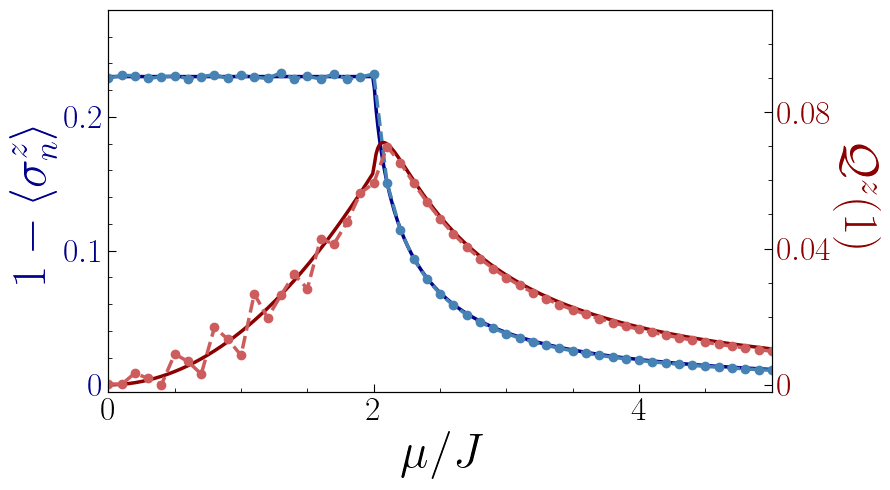

In [51]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

fig, ax1 = plt.subplots(figsize=(9, 5))
ax2 = ax1.twinx()

color1 = '#4682B4'  # SteelBlue - a bit darker for dashed line
dashed_color1 = '#00008B'  # Darker blue for solid line
color2 = '#CD5C5C'  # IndianRed - a bit darker for dashed line
dashed_color2 = '#8B0000'  # Darker red for solid line
color1_axis_label = '#00008B' # Darker blue for axis label and ticks
color2_axis_label = '#8B0000' # Darker red for axis label and ticks


# Plotting lines with updated styles
ax1.plot(muArray, density_F, color=color1, linewidth=2.5, linestyle='dashed', marker='o', markersize=6, label=r'$1 - \langle \sigma_n^z \rangle$ (MPS)', zorder=2)
ax1.plot(muAnal, density_F_anal, color=dashed_color1, linewidth=2.5, linestyle='solid', label=r'$1 - \langle \sigma_n^z \rangle$ (Theory)', zorder=1)
ax2.plot(muArray, Sz_F_correlation, color=color2, linewidth=2.5, linestyle='dashed', marker='o', markersize=6, label=r'$\mathcal{Q}^{z}(1)$ (MPS)', zorder=2)
ax2.plot(muAnal, Sz_F_corr_anal, color=dashed_color2, linewidth=2.5, linestyle='solid', label=r'$\mathcal{Q}^{z}(1)$ (Theory)', zorder=1)

ax1.set_xlabel(r'$\mu/J$', fontsize=35)
ax1.set_ylabel(r'$1 - \langle \sigma_n^z \rangle$', color=color1_axis_label, fontsize=35)
ax2.set_ylabel(r'$\mathcal{Q}^{z}(1)$', color=color2_axis_label, fontsize=35, rotation=270, labelpad=35)

ax1.tick_params(axis='y', labelcolor=color1_axis_label)
ax2.tick_params(axis='y', labelcolor=color2_axis_label)
ax1.tick_params(axis='both', which='major', direction='in', length=6, labelsize=16)
ax1.tick_params(axis='both', which='minor', direction='in', length=3, labelsize=16)
ax2.tick_params(axis='both', which='major', direction='in', length=6, labelsize=16)
ax2.tick_params(axis='both', which='minor', direction='in', length=3, labelsize=16)

ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

ax1.set_ylim([-0.0055, 0.28])
ax2.set_ylim([-0.002, 0.11])
ax1.set_xlim([0, 5])

ax1.set_xticks([0, 2, 4], labels=[r'$0$', r'$2$', r'$4$'], fontsize=24)
ax1.set_yticks([0, 0.1, 0.2], labels=[r'$0$', r'$0.1$', r'$0.2$'], fontsize=24)
ax2.set_yticks([0, 0.04, 0.08], labels=[r'$0$', r'$0.04$', r'$0.08$'], fontsize=24)

# ax1.axvline(x=2*J, color='gray', linestyle='--', linewidth=1.5)

#ax1.legend(loc='upper left', fontsize=20.25, frameon=False)
#ax2.legend(loc='upper right', fontsize=20.25, frameon=False)

plt.tight_layout()
plt.savefig('pic1_MPS_adiabatic.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

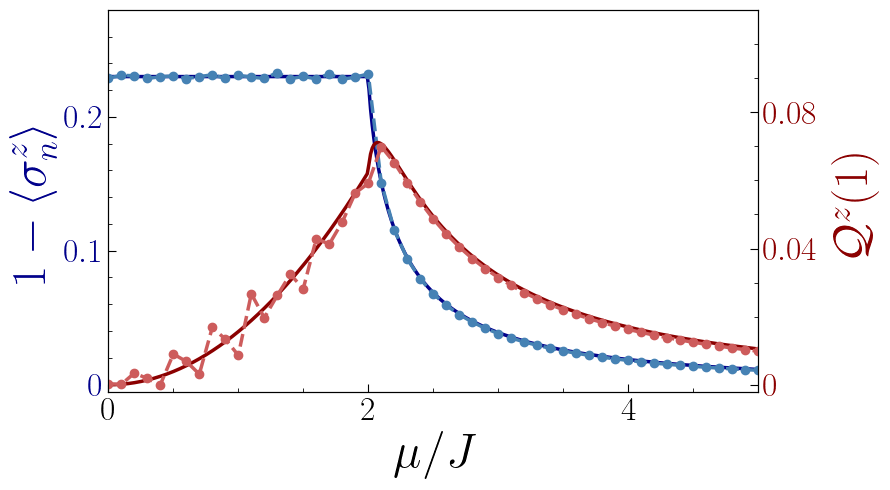

In [14]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

fig, ax1 = plt.subplots(figsize=(9, 5))
ax2 = ax1.twinx()

color1 = '#4682B4'   # SteelBlue - a bit darker for dashed line
dashed_color1 = '#00008B'   # Darker blue for solid line
color2 = '#CD5C5C'   # IndianRed - a bit darker for dashed line
dashed_color2 = '#8B0000'   # Darker red for solid line
color1_axis_label = '#00008B' # Darker blue for axis label and ticks
color2_axis_label = '#8B0000' # Darker red for axis label and ticks


# Plotting lines with updated styles
ax1.plot(muArray, density_F, color=color1, linewidth=2.5, linestyle='dashed', marker='o', markersize=6, label=r'$1 - \langle \sigma_n^z \rangle$ (MPS)', zorder=2)
ax1.plot(muAnal, density_F_anal, color=dashed_color1, linewidth=2.5, linestyle='solid', label=r'$1 - \langle \sigma_n^z \rangle$ (Theory)', zorder=1)
ax2.plot(muArray, Sz_F_correlation, color=color2, linewidth=2.5, linestyle='dashed', marker='o', markersize=6, label=r'$\mathcal{Q}^{z}(1)$ (MPS)', zorder=2)
ax2.plot(muAnal, Sz_F_corr_anal, color=dashed_color2, linewidth=2.5, linestyle='solid', label=r'$\mathcal{Q}^{z}(1)$ (Theory)', zorder=1)

ax1.set_xlabel(r'$\mu/J$', fontsize=35)
ax1.set_ylabel(r'$1 - \langle \sigma_n^z \rangle$', color=color1_axis_label, fontsize=35)
ax2.set_ylabel(r'$\mathcal{Q}^{z}(1)$', color=color2_axis_label, fontsize=35, rotation=90, labelpad=10)

ax1.tick_params(axis='y', labelcolor=color1_axis_label)
ax2.tick_params(axis='y', labelcolor=color2_axis_label)
ax1.tick_params(axis='both', which='major', direction='in', length=6, labelsize=16)
ax1.tick_params(axis='both', which='minor', direction='in', length=3, labelsize=16)
ax2.tick_params(axis='both', which='major', direction='in', length=6, labelsize=16)
ax2.tick_params(axis='both', which='minor', direction='in', length=3, labelsize=16)

ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

ax1.set_ylim([-0.0055, 0.28])
ax2.set_ylim([-0.002, 0.11])
ax1.set_xlim([0, 5])

ax1.set_xticks([0, 2, 4], labels=[r'$0$', r'$2$', r'$4$'], fontsize=24)
ax1.set_yticks([0, 0.1, 0.2], labels=[r'$0$', r'$0.1$', r'$0.2$'], fontsize=24)
ax2.set_yticks([0, 0.04, 0.08], labels=[r'$0$', r'$0.04$', r'$0.08$'], fontsize=24)

# ax1.axvline(x=2*J, color='gray', linestyle='--', linewidth=1.5)

#ax1.legend(loc='upper left', fontsize=20.25, frameon=False)
#ax2.legend(loc='upper right', fontsize=20.25, frameon=False)

plt.tight_layout()
plt.savefig('pic1_MPS_adiabatic.png', dpi=300, format='png', bbox_inches='tight')
plt.show()